In [2]:
# Import packages
import pandas as pd
import os
import numpy as np

In [5]:
# Load data
local_df = pd.read_csv(os.path.join('../data', 'top_local_ID_earrings_sales.csv'))
local_df = local_df.drop(['shop_id', 'item_id', 'source', 'level2_global_be_category'], axis=1)
local_df

,total_sales,product_title
0,60011,Topi baseball korea piercing ANTING anting KPOP
1,45123,Tempat kalung custom / Tempat aksesoris access...
2,36211,(Art paper 310gr) Kertas anting /tempat anting...
3,31019,tindik telinga steril 1x pakai disposeable ear...
4,22060,Kancing Mutiara Metal Pearl Button IMPORT Z-01
...,...,...
995,60,Anting Dream Catcher/Earing/Bali/Shurim/akseso...
996,59,Anting Plastik
997,59,sumping jaranan.
998,59,Butterfly lock (pengunci anting)


In [6]:
# Calculate characters length of title
titles_length = []

for title in local_df['product_title']:
    title_length = len(title)
    titles_length.append(title_length)

titles_length_df = pd.DataFrame(titles_length, columns=['title_length'])
local_df2 = pd.concat([local_df, titles_length_df], axis=1)

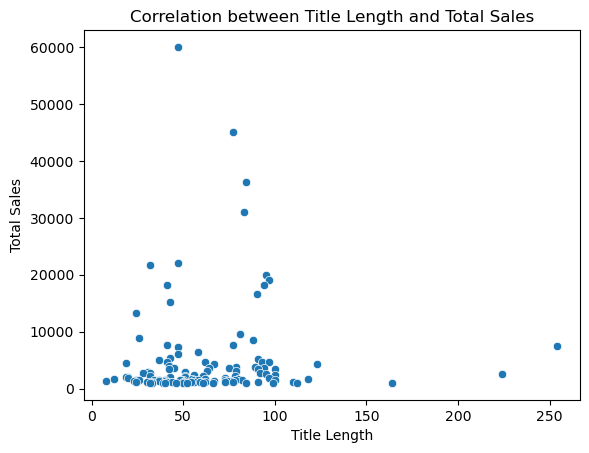

Pearson correlation coeff: 0.06170321956099671


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_data = local_df2[local_df2['total_sales'] > 1000]

sns.scatterplot(data=plot_data, x='title_length', y='total_sales')
plt.xlabel('Title Length')
plt.ylabel('Total Sales')
plt.title('Correlation between Title Length and Total Sales')
plt.show()

correlation_coef = plot_data['title_length'].corr(plot_data['total_sales'])
print("Pearson correlation coeff:", correlation_coef)

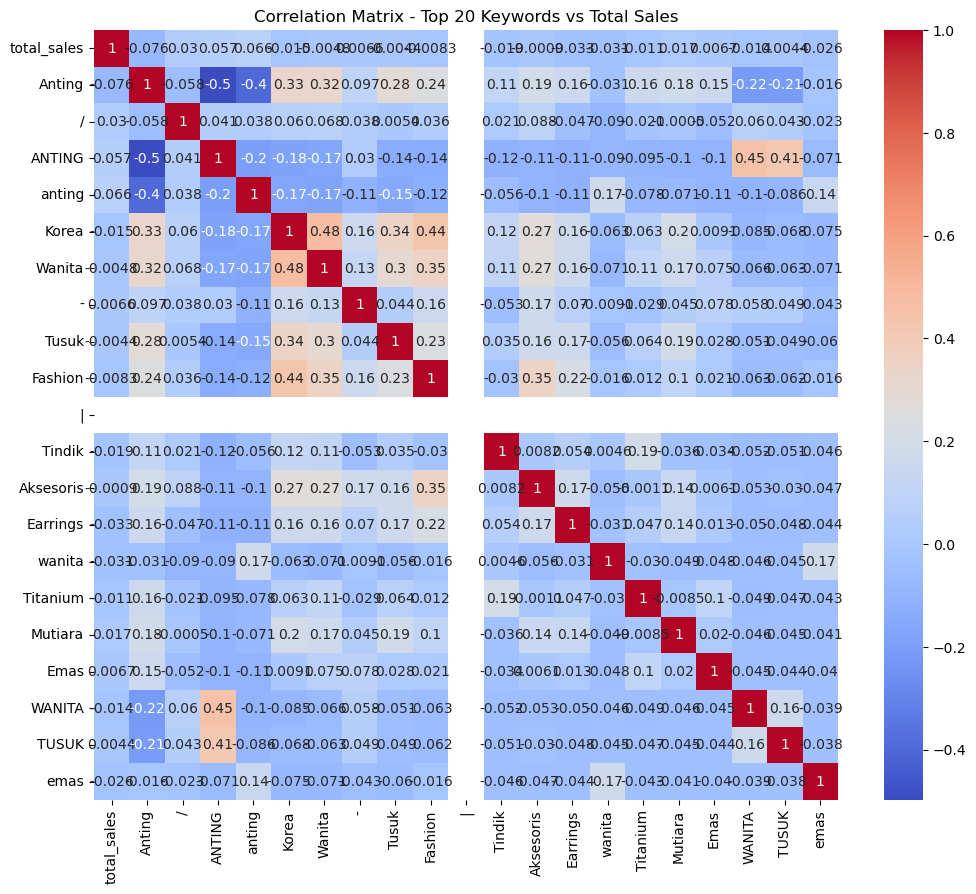

In [27]:
# Step 1: Extract keywords from product titles
keywords = local_df['product_title'].str.split(expand=True).stack().value_counts()

# Step 2: Select top 20 most common keywords
top_20_keywords = keywords.head(20)

# Step 3: Create a new DataFrame with selected keywords and total sales
keyword_sales_df = local_df[['total_sales']].copy()
for keyword in top_20_keywords.index:
    keyword_sales_df[keyword] = local_df['product_title'].str.contains(keyword).astype(int)

# Step 4: Calculate correlation matrix
correlation_matrix = keyword_sales_df.corr()

# Step 5: Plot correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Top 20 Keywords vs Total Sales')
plt.show()

In [28]:
keywords.head(50)

Anting       755
/            270
ANTING       257
anting       242
Korea        147
Wanita       137
-            136
Tusuk        101
Fashion       85
|             64
Tindik        63
Aksesoris     61
Earrings      53
wanita        51
Titanium      51
Mutiara       50
Emas          45
WANITA        45
TUSUK         44
emas          39
korea         38
1             37
Model         37
Pria          36
Hijab         35
Magnet        34
tindik        34
Gold          34
Murah         33
Anti          33
KOREA         33
Gaya          33
TINDIK        32
titanium      32
tusuk         32
Jepit         30
Lapis         30
Import        30
dan           29
Bunga         28
Earring       28
Karat         27
Silver        27
Giwang        27
Hitam         27
FASHION       27
Panjang       27
Stud          26
Set           25
Perhiasan     25
dtype: int64

In [29]:
# Load data
local_labeled_df = pd.read_csv(os.path.join('../data', 'top_local_ID_earrings_sales_labeled.csv'))
local_labeled_df

,total_sales,product_title,Brand Presence,Unique Feature,Material,Product_ID,Sum
0,21655,2pcs kait anting Gold dan silver,0,0,1,1,2
1,19006,OSM - F534 Anting Ala Korea / Anting Panjang /...,1,1,0,1,3
2,18248,✅COD Anting Titanium Panjang Anti Karat Lapis ...,0,1,1,1,3
3,16689,[MS108] ER 10 - Anting Tusuk KOREA Wanita Mode...,0,1,1,1,3
4,15127,ANTING PALSU TITANIUM TANPA TINDIK TERMURAH,0,1,1,0,2
...,...,...,...,...,...,...,...
945,60,Anting Dream Catcher/Earing/Bali/Shurim/akseso...,0,0,0,0,0
946,59,Anting Plastik,0,0,0,0,0
947,59,sumping jaranan.,0,0,0,0,0
948,59,Butterfly lock (pengunci anting),0,0,0,0,0


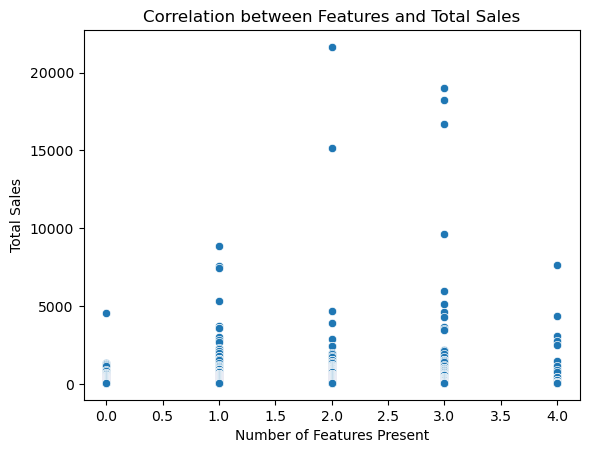

Pearson correlation coeff: 0.23531657477967802


In [32]:
sns.scatterplot(data=local_labeled_df, x='Sum', y='total_sales')
plt.xlabel('Number of Features Present')
plt.ylabel('Total Sales')
plt.title('Correlation between Features and Total Sales')
plt.show()

correlation_coef = local_labeled_df['Sum'].corr(local_labeled_df['total_sales'])
print("Pearson correlation coeff:", correlation_coef)

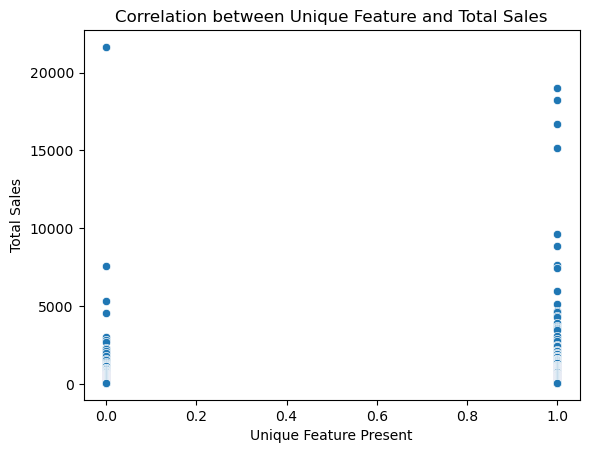

Pearson correlation coeff: 0.3217567000934481


In [33]:
sns.scatterplot(data=local_labeled_df, x='Unique Feature', y='total_sales')
plt.xlabel('Unique Feature Present')
plt.ylabel('Total Sales')
plt.title('Correlation between Unique Feature and Total Sales')
plt.show()

correlation_coef = local_labeled_df['Unique Feature'].corr(local_labeled_df['total_sales'])
print("Pearson correlation coeff:", correlation_coef)

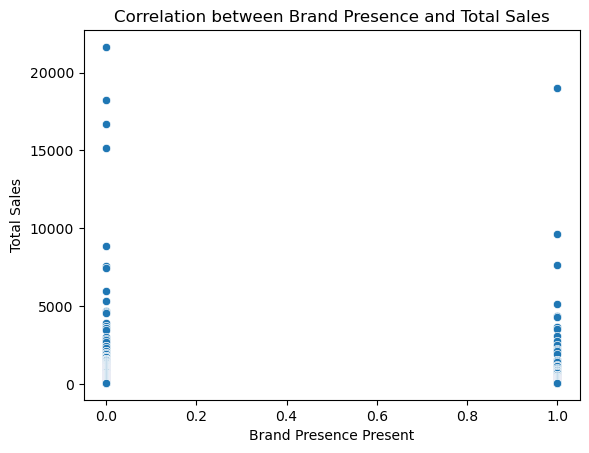

Pearson correlation coeff: 0.0814136926448603


In [34]:
sns.scatterplot(data=local_labeled_df, x='Brand Presence', y='total_sales')
plt.xlabel('Brand Presence Present')
plt.ylabel('Total Sales')
plt.title('Correlation between Brand Presence and Total Sales')
plt.show()

correlation_coef = local_labeled_df['Brand Presence'].corr(local_labeled_df['total_sales'])
print("Pearson correlation coeff:", correlation_coef)

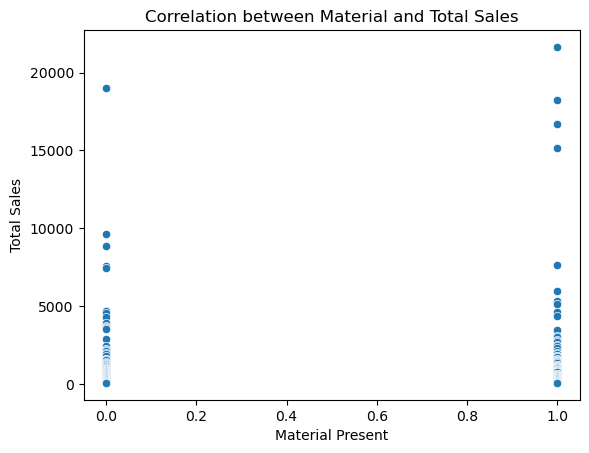

Pearson correlation coeff: 0.05617467647735532


In [35]:
sns.scatterplot(data=local_labeled_df, x='Material', y='total_sales')
plt.xlabel('Material Present')
plt.ylabel('Total Sales')
plt.title('Correlation between Material and Total Sales')
plt.show()

correlation_coef = local_labeled_df['Material'].corr(local_labeled_df['total_sales'])
print("Pearson correlation coeff:", correlation_coef)

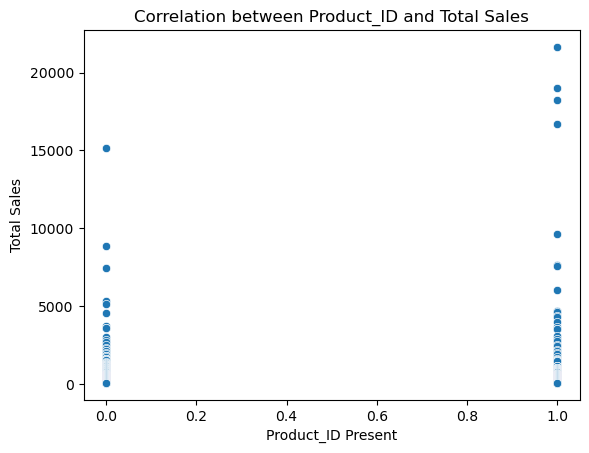

Pearson correlation coeff: 0.1006107202737166


In [37]:
sns.scatterplot(data=local_labeled_df, x='Product_ID', y='total_sales')
plt.xlabel('Product_ID Present')
plt.ylabel('Total Sales')
plt.title('Correlation between Product_ID and Total Sales')
plt.show()

correlation_coef = local_labeled_df['Product_ID'].corr(local_labeled_df['total_sales'])
print("Pearson correlation coeff:", correlation_coef)